In [88]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from Data.Featurisation import data_handeler
import numpy as np
import torch
from scale import Scale
from hyperparameters.hyperparameters import hyperparameters_source
from Models.lstm import LSTM
from tensors.Tensorisation import Tensorisation
import scienceplots
plt.rcdefaults()
plt.style.use(['science'])
avg_rmse = pd.read_pickle("evaluation/Target/avg_rmse.pkl")
avg_times = pd.read_pickle("evaluation/Target/avg_times.pkl")
rmse = pd.read_pickle("evaluation/Target/rmse.pkl")
time = pd.read_pickle("evaluation/Target/times.pkl")
time = time.loc[:,(slice(None), 'Training Time')]
sites = range(9)
models = [0,1,5,6,2,3,4,8,9]
model_labels = [r"$\text{Transf}_{np}$", r"$\text{Transf}_{p}$", r"$\text{Transf}_{nw}$",r"$\text{Targ}_{np}$", r"$\text{Targ}_{p}$",r"$\text{Transf}_{ra,np}$",
                 r"$\text{Transf}_{ra,p}$", "niks", "Phys", "Persis"]
import itertools



In [89]:
installation_int = 0
ceda = pd.read_pickle(f"Data/Sites/NWP_{installation_int}.pkl")
openmeteo = pd.read_pickle(f"Data/Sites/Reanalysis_{installation_int}.pkl")
pvgis = pd.read_pickle(f'Data/Sites/PVGIS_{installation_int}.pkl')
is_day = pd.read_pickle(f'Data/Sites/is_day_{installation_int}.pkl')
power = pd.read_pickle(f"Data/Sites/PV_{installation_int}.pkl")
meteo2CEDA = {'temperature_2m' :'temperature_1_5m', 
              "relative_humidity_2m":"relative_humidity_1_5m", 
              "pressure_msl": "pressure_MSL",
              "cloud_cover":"total_cloud_amount",
              "shortwave_radiation": "downward_surface_SW_flux",
              "diffuse_radiation":"diffuse_surface_SW_flux",
              "direct_normal_irradiance":"direct_surface_SW_flux",
              "wind_speed_10m": "wind_speed_10m",
              "wind_direction_10m": "wind_direction_10m"
              }
openmeteo = openmeteo.rename(columns=meteo2CEDA)
variates = list(ceda.columns)
rows = int(np.ceil(np.sqrt(len(variates))))


In [90]:
np.nanmean(abs((openmeteo-ceda)["downward_surface_SW_flux"]))

32.86814

## Februari 2021

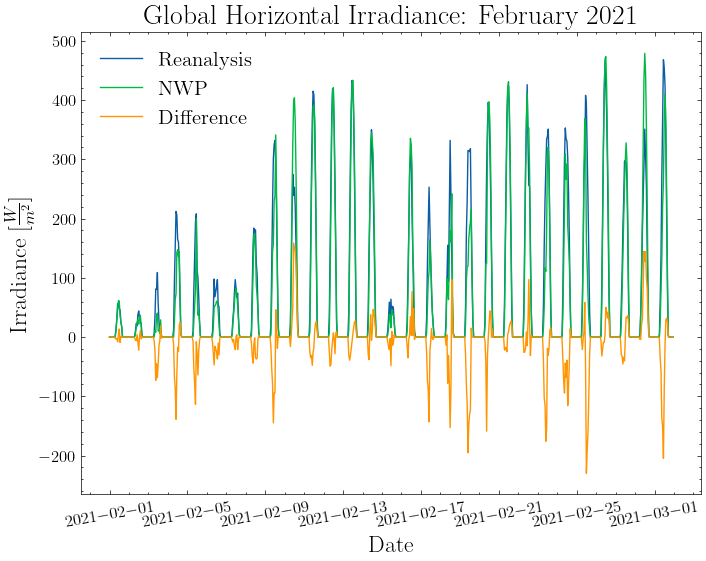

In [91]:
reanal_feb = openmeteo["2021-02-01":"2021-03-01"]
nwp_feb = ceda["2021-02-01":"2021-03-01"]
plt.figure(figsize=(8,6))
plt.plot(reanal_feb["downward_surface_SW_flux"], label="Reanalysis")
plt.plot(nwp_feb["downward_surface_SW_flux"], label="NWP")
plt.plot(nwp_feb['downward_surface_SW_flux']-reanal_feb['downward_surface_SW_flux'], label="Difference")
plt.ylabel(r"Irradiance [$\frac{W}{m^2}$]", fontsize=17)
plt.xlabel("Date", fontsize=17)
plt.xticks(fontsize=12, rotation=10)
plt.yticks(fontsize=12)
plt.legend(fontsize=15)
plt.title("Global Horizontal Irradiance: February 2021", fontsize=20)
plt.savefig("Figures/evaluation/febr2021/ghi", dpi=200)

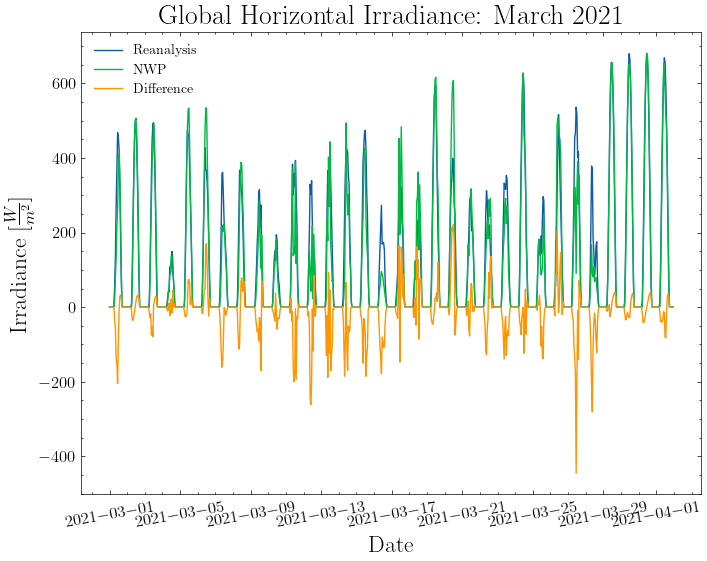

In [92]:
reanal_march = openmeteo["2021-03-01":"2021-04-01"]
nwp_march = ceda["2021-03-01":"2021-04-01"]
plt.figure(figsize=(8,6))
plt.plot(reanal_march["downward_surface_SW_flux"], label="Reanalysis")
plt.plot(nwp_march["downward_surface_SW_flux"], label="NWP")
plt.plot(nwp_march['downward_surface_SW_flux']-reanal_march['downward_surface_SW_flux'], label="Difference")
plt.ylabel(r"Irradiance [$\frac{W}{m^2}$]", fontsize=17)
plt.xlabel("Date", fontsize=17)
plt.xticks(fontsize=12, rotation=10)
plt.yticks(fontsize=12)
plt.legend()
plt.title("Global Horizontal Irradiance: March 2021", fontsize=20)
plt.savefig("Figures/evaluation/febr2021/ghi_march", dpi=200)

Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


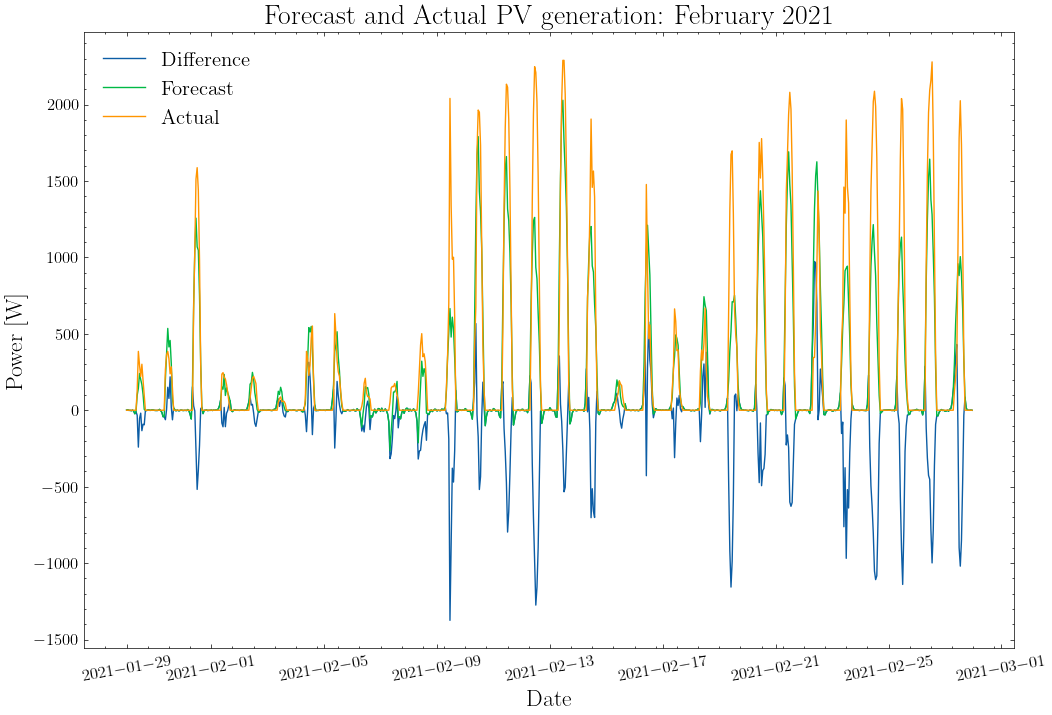

In [93]:
with open(f"DA_forecasts/DA_0_0", 'rb') as f:
    DA_forecast = pickle.load(f)
month = 9
_,_,eval_data =data_handeler(installation_int, "nwp", "nwp", "nwp", transform = False)
power = eval_data['P']
feb_DA_forecast = DA_forecast.iloc[(month*30+0)*24:((month+0)*30+30)*24] #(30 days *24
feb_power = power.iloc[(month*30+0)*24:((month+0)*30+30)*24] ###CHANGE BACK TO  31
# plt.plot(range(len(DA_forecast.index)),DA_forecast, label="Forecast")
# plt.plot(range(len(DA_forecast.index)),power, label="Actual")
substr = (feb_DA_forecast-feb_power)
plt.figure(figsize=(12,8))
plt.plot(substr, label = "Difference")
plt.plot(feb_DA_forecast, label = "Forecast")
plt.plot(feb_power, label="Actual")
plt.ylabel("Power [W]", fontsize=17)
plt.xlabel("Date", fontsize=17)
plt.xticks(fontsize=12, rotation=10)
plt.yticks(fontsize=12)

plt.title("Forecast and Actual PV generation: February 2021", fontsize=20)
plt.legend(fontsize=15)
plt.savefig("Figures/evaluation/febr2021/PV", dpi=200)

Not in Colab environment: Using .pkl files


c:\Users\Robbe\SolNet-2\Data\Featurisation.py:167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['date'] = dataset.index.date


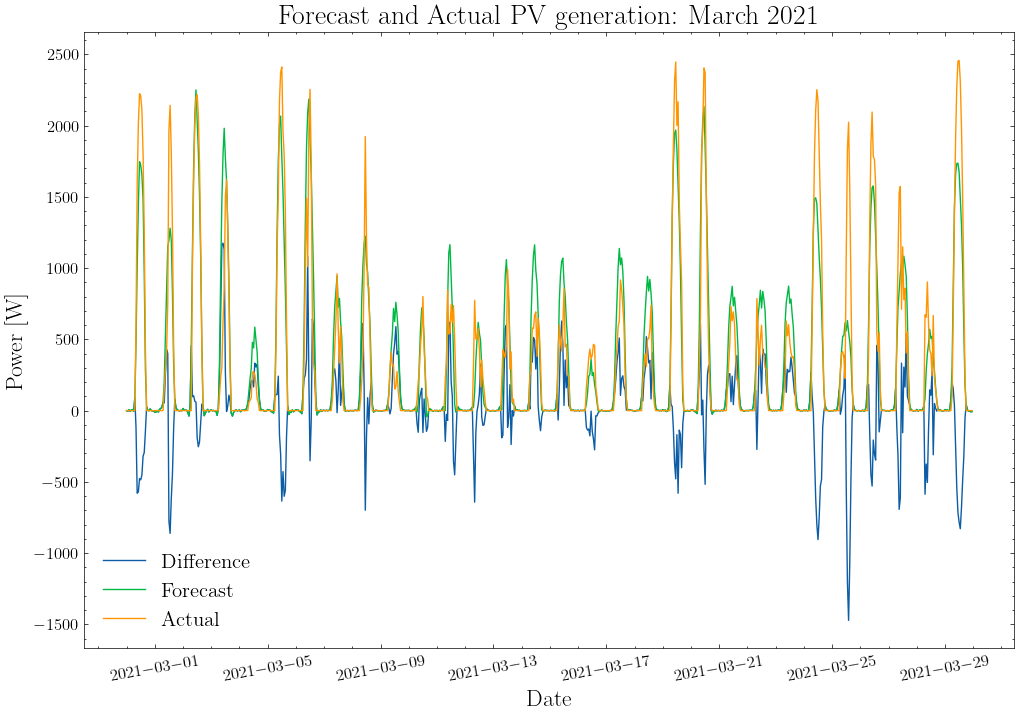

In [94]:
with open(f"DA_forecasts/DA_0_0", 'rb') as f:
    DA_forecast = pickle.load(f)
month = 10
_,_,eval_data =data_handeler(installation_int, "nwp", "nwp", "nwp", transform = False)
power = eval_data['P']
mar_DA_forecast = DA_forecast.iloc[(month*30+0)*24:((month+0)*30+30)*24] #(30 days *24
mar_power = power.iloc[(month*30+0)*24:((month+0)*30+30)*24] ###CHANGE BACK TO  31
# plt.plot(range(len(DA_forecast.index)),DA_forecast, label="Forecast")
# plt.plot(range(len(DA_forecast.index)),power, label="Actual")
substr = (mar_DA_forecast-mar_power)
plt.figure(figsize=(12,8))
plt.plot(substr, label = "Difference")
plt.plot(mar_DA_forecast, label = "Forecast")
plt.plot(mar_power, label="Actual")
plt.ylabel("Power [W]", fontsize=17)
plt.xlabel("Date", fontsize=17)
plt.xticks(fontsize=12, rotation=10)
plt.yticks(fontsize=12)

plt.title("Forecast and Actual PV generation: March 2021", fontsize=20)
plt.legend(fontsize=15)
plt.savefig("Figures/evaluation/febr2021/PV_march", dpi=200)

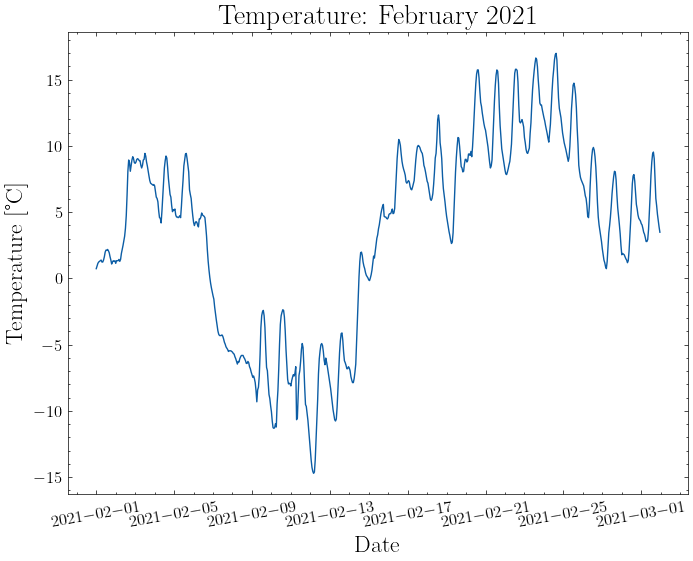

In [95]:
plt.figure(figsize=(8,6))
plt.plot(reanal_feb["temperature_1_5m"]-273.15)
plt.ylabel("Temperature [°C]", fontsize=17)
plt.xlabel("Date", fontsize=17)
plt.xticks(fontsize=12, rotation=10)
plt.yticks(fontsize=12)

plt.title("Temperature: February 2021", fontsize=20)
plt.savefig("Figures/evaluation/febr2021/temp", dpi=200)


In [96]:
T = openmeteo["temperature_1_5m"]
T = T["2016-05-01":"2021-01-31"]
T.min()-273.15

-7.319494628906227